In [1]:
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


### Helper Functions

In [2]:
import tensorflow as tf

def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    
    return tf.Variable(initial)

def conv2d(x, W):
    
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
    
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                          strides=[1, 2, 2, 1], padding='SAME')

### Model

In [3]:
# reshape
x = tf.placeholder('float', shape=[None, 784])
x_image = tf.reshape(x, [-1, 28, 28, 1])

# conv
W_conv1 = weight_variable([5, 5, 1, 32])
b_conv1 = bias_variable([32])
z_conv1 = conv2d(x_image, W_conv1) + b_conv1

# relu -> pool
h_conv1 = tf.nn.relu(z_conv1)
h_pool1 = max_pool_2x2(h_conv1)

# conv
W_conv2 = weight_variable([5, 5, 32, 64])
b_conv2 = bias_variable([64])
z_conv2 = conv2d(h_pool1, W_conv2) + b_conv2

# relu -> pool
h_conv2 = tf.nn.relu(z_conv2)
h_pool2 = max_pool_2x2(h_conv2)

# reshape -> fc
h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
W_fc1 = weight_variable([7 * 7 * 64, 1024])
b_fc1 = bias_variable([1024])
z_fc1 = tf.matmul(h_pool2_flat, W_fc1) + b_fc1

# relu
h_fc1 = tf.nn.relu(z_fc1)

# dropout
keep_prob = tf.placeholder('float')
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

# softmax weights
W_fc2 = weight_variable([1024, 10])
b_fc2 = bias_variable([10])
scores = tf.matmul(h_fc1_drop, W_fc2) + b_fc2

# softmax + cross-entropy
probs = tf.nn.softmax(scores)
y = tf.placeholder('float', shape=[None, 10])
cross_entropy = -tf.reduce_sum(y*tf.log(probs))

# evaluation
correct_predictions = tf.equal(tf.argmax(probs, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_predictions, 'float'))

### Train

In [23]:
sess = tf.InteractiveSession()

train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)

init = tf.initialize_all_variables()
sess.run(init)

def train(iters=2000):
    for i in range(iters):
        batch_xs, batch_ys = mnist.train.next_batch(50)
        if not i % 100:
            train_accuracy = accuracy.eval(feed_dict={x: batch_xs, y: batch_ys, keep_prob: 1.0})
            print 'step {}: training accuracy = {}'.format(i, train_accuracy)
            
            yield train_accuracy

        train_step.run(feed_dict={x: batch_xs, y: batch_ys, keep_prob: 0.5})
    
train_accuracies = list(train())

step 0: training accuracy = 0.0799999982119
step 100: training accuracy = 0.839999973774
step 200: training accuracy = 0.920000016689
step 300: training accuracy = 0.839999973774
step 400: training accuracy = 0.839999973774
step 500: training accuracy = 0.959999978542
step 600: training accuracy = 0.959999978542
step 700: training accuracy = 0.920000016689
step 800: training accuracy = 0.920000016689
step 900: training accuracy = 0.959999978542
step 1000: training accuracy = 0.920000016689
step 1100: training accuracy = 0.959999978542
step 1200: training accuracy = 0.959999978542
step 1300: training accuracy = 0.959999978542
step 1400: training accuracy = 0.980000019073
step 1500: training accuracy = 1.0
step 1600: training accuracy = 0.980000019073
step 1700: training accuracy = 0.980000019073
step 1800: training accuracy = 1.0
step 1900: training accuracy = 0.980000019073


### Plot

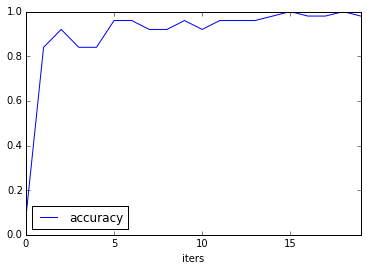

In [25]:
df = pd.DataFrame(train_accuracies, columns=['accuracy'])
df.index.name = 'iters'

df.plot()

### Evaluate on Test Set

In [26]:
accuracy.eval(feed_dict={x: mnist.test.images, y: mnist.test.labels, keep_prob: 1.0})

0.977